In [6]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv('Social_Network_Ads.csv')

In [8]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 14.1+ KB


In [10]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [11]:
df.drop('User ID' , axis = 1 , inplace=True)

In [12]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [13]:
# Get Dummies over Gender

gender = pd.get_dummies(df["Gender"],drop_first=True)

In [14]:
df = pd.concat([df,gender],axis = 1)

In [15]:
df.head()

,Gender,Age,EstimatedSalary,Purchased,Male
0,Male,19,19000,0,1
1,Male,35,20000,0,1
2,Female,26,43000,0,0
3,Female,27,57000,0,0
4,Male,19,76000,0,1


In [16]:
df.drop("Gender" , axis=1 , inplace=True)

In [17]:
df.head()

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


In [18]:
import seaborn as sns

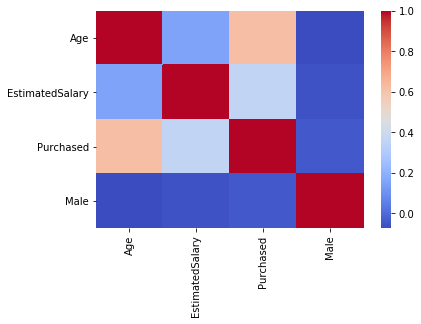

In [19]:
sns.heatmap(df.corr() , cmap='coolwarm')

In [20]:
df.drop("Male", inplace=True , axis=1)

In [21]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
ss = StandardScaler()

In [24]:
scaled_array = ss.fit_transform(df.drop('Purchased' , axis = 1))


In [25]:
x = pd.DataFrame(data = scaled_array , columns=df.columns[:-1])

In [26]:
x.head()

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751


In [27]:
y  =  df['Purchased']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.3)

In [32]:
from sklearn.svm import SVC

In [34]:
classifier = SVC()

In [37]:
classifier.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [38]:
y_pred = classifier.predict(x_test)

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [40]:
cm

array([[73,  7],
       [ 4, 36]], dtype=int64)

In [43]:
from sklearn.naive_bayes import GaussianNB

In [44]:
clf = GaussianNB()

In [46]:
clf.fit(x_train, y_train)

GaussianNB(priors=None)

In [47]:
y_pred = clf.predict(x_test)

In [49]:
cm = confusion_matrix(y_test, y_pred)

In [50]:
cm

array([[75,  5],
       [ 6, 34]], dtype=int64)